EDA 2 - Merged Dataset

In [89]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
import demoji
import seaborn as sns
import nltk
from datetime import date

In [90]:
os.getcwd()

'/Users/katymatulay/Documents/Drexel - Grad School/07 Fall 2022/DSCI591/Capstone/data'

In [91]:
os.chdir('/Users/katymatulay/Documents/Drexel - Grad School/07 Fall 2022/DSCI591/Capstone/data')

In [92]:
df = pd.read_pickle("../data/merged_datasetpickle.pkl")

In [6]:
df.shape

(2610060, 18)

In [47]:
df.shape

(2610052, 17)

In [94]:
df.head()

,external_author_id,author,content,region,language,publish_date,following,followers,updates,is_retweet,account_category,tweet_id,full_url,data_source,has_URL,emoji_text,emoji_count
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01 19:58:00,1052,9636,253,0,RightTroll,914580356430536707,https://twitter.com/10_gop/status/914580356430...,Troll,1,[],0
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01 22:43:00,1054,9637,254,0,RightTroll,914621840496189440,https://twitter.com/damienwoody/status/9145685...,Troll,1,[],0
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01 22:50:00,1054,9637,255,1,RightTroll,914623490375979008,https://twitter.com/10_gop/status/913231923715...,Troll,1,[],0
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01 23:52:00,1062,9642,256,0,RightTroll,914639143690555392,https://twitter.com/10_gop/status/914639143690...,Troll,1,[],0
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01 02:13:00,1050,9645,246,1,RightTroll,914312219952861184,https://twitter.com/realDonaldTrump/status/914...,Troll,1,[flag: United States],1


In [95]:
df.isnull().sum()

external_author_id         0
author                     0
content                    0
region                 52767
language                   0
publish_date               0
following                  0
followers                  0
updates                    0
is_retweet                 0
account_category           0
tweet_id                   0
full_url              868926
data_source                0
has_URL                    0
emoji_text                 0
emoji_count                0
dtype: int64

In [50]:
df['is_retweet'].value_counts()

0    1673960
1     936092
Name: is_retweet, dtype: int64

In [52]:
df['data_source'].value_counts()

Troll            2116866
Verified_User     493186
Name: data_source, dtype: int64

In [97]:
df['emoji_count'].value_counts().sort_index()

0      2548431
1        39794
2        10033
3         5575
4         2621
5         1286
6          740
7          349
8          261
9          190
10         134
11          88
12         118
13          63
14          39
15          41
16          52
17          79
18          14
19           6
20          14
21           9
22          11
23           6
24          14
25           9
26           9
27           3
28           2
29           5
30           6
31           3
32           3
33           1
34           5
35           2
36           1
37           2
38           1
42           1
43           1
44           2
45           3
47           1
49           1
50           1
56           1
57          14
61           1
72           1
85           1
107          1
108          1
116          1
118          1
Name: emoji_count, dtype: int64

<AxesSubplot:>

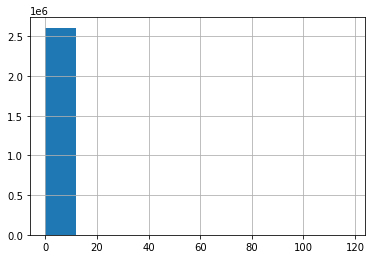

In [99]:
df['emoji_count'].hist()

In [100]:
df[df['emoji_count']>1].head()

,external_author_id,author,content,region,language,publish_date,following,followers,updates,is_retweet,account_category,tweet_id,full_url,data_source,has_URL,emoji_text,emoji_count
6,906000000000000000,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z,Unknown,English,2017-10-01 02:48:00,1050,9644,248,1,RightTroll,914321156466933760,https://twitter.com/Cernovich/status/914314644...,Troll,1,"[honeybee, honeybee, honeybee]",3
16,906000000000000000,10_GOP,First lady Melania Trump visits infant opioid ...,Unknown,English,2017-10-10 23:42:00,1068,10328,304,0,RightTroll,917898105365909504,https://twitter.com/10_gop/status/917898105365...,Troll,1,"[red heart, red heart]",2
39,906000000000000000,10_GOP,A cute 10 yo girl had a Trump dress on. Hannit...,Unknown,English,2017-10-12 03:02:00,1072,10366,317,0,RightTroll,918310998913798144,https://twitter.com/10_gop/status/918310998913...,Troll,1,"[red heart, red heart]",2
74,906000000000000000,10_GOP,'@Cernovich @KFILE JOURNALISM 😱😱',Unknown,English,2017-10-02 22:37:00,1066,9721,269,0,RightTroll,914982688028798976,NaN,Troll,0,"[face screaming in fear, face screaming in fear]",2
79,906000000000000000,10_GOP,The truth about Puerto Rico 🇵🇷 &amp; it's not ...,Unknown,English,2017-10-02 02:42:00,1064,9651,258,1,RightTroll,914681854858600449,https://twitter.com/ExDemLatina/status/9146187...,Troll,1,"[flag: Puerto Rico, diamond suit, diamond suit]",3


In [71]:
df['account_category'].value_counts()

RightTroll       704953
NewsFeed         596593
Verified_User    493186
LeftTroll        422141
HashtagGamer     236091
Commercial       112580
NonEnglish        26562
Fearmonger        11001
Unknown            6945
Name: account_category, dtype: int64

In [73]:
verified_filter = df['account_category']=='Verified_User'

In [76]:
Troll_filter = df['data_source']=='Troll'

In [75]:
df.where(verified_filter).groupby('author')['content'].count().nlargest(10)

author
AskTSA       49321
thehill      29047
business     26248
csmonitor    19926
NASA         17497
TIME         17038
StateDept    16716
nytimes      16584
WSJ          14778
Reuters      14474
Name: content, dtype: int64

In [77]:
df.where(Troll_filter).groupby('author')['content'].count().nlargest(10)

author
EXQUOTE            53158
SCREAMYMONKEY      43956
WORLDNEWSPOLI      35082
AMELIEBALDWIN      34308
TODAYPITTSBURGH    33377
SPECIALAFFAIR      32416
SEATTLE_POST       30680
KANSASDAILYNEWS    28746
ROOMOFRUMOR        28259
DAILYSANFRAN       27962
Name: content, dtype: int64

In [80]:
start_EXQUOTE= df[df['author']=='EXQUOTE']['publish_date'].min()
end_EXQUOTE = df[df['author']=='EXQUOTE']['publish_date'].max()

In [85]:
start_EXQUOTE
mm/dd/yyyy hh:mm

'7/10/2015 0:00'

In [86]:
df['publish_date'].head()

0    10/1/2017 19:58
1    10/1/2017 22:43
2    10/1/2017 22:50
3    10/1/2017 23:52
4     10/1/2017 2:13
Name: publish_date, dtype: object

In [87]:
#delete once fixed in UPP notebook
df['publish_date']= pd.to_datetime(df['publish_date'], infer_datetime_format=True)

In [88]:
df['publish_date'].head()

0    2017-10-01 19:58:00
1    2017-10-01 22:43:00
2    2017-10-01 22:50:00
3    2017-10-01 23:52:00
4    2017-10-01 02:13:00
Name: publish_date, dtype: object